Column Name	Attribute/Target	Description
ID	N/A	Unique number to represent patient ID
PRG	Attribute1	Plasma glucose
PL	Attribute 2	Blood Work Result-1 (mu U/ml) -->  PL=platelet count is a lab test to measure how many platelets you have in your blood. Platelets are parts of the blood that helps the blood clot.
PR	Attribute 3	Blood Pressure (mm Hg)
SK	Attribute 4	Blood Work Result-2 (mm)
TS	Attribute 5	Blood Work Result-3 (mu U/ml)
M11	Attribute 6	Body mass index (weight in kg/(height in m)^2
BD2	Attribute 7	Blood Work Result-4 (mu U/ml)
Age	Attribute 8	patients age (years)
Insurance	N/A	If a patient holds a valid insurance card
                                 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error as mse

warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
patients_test=pd.read_csv('C:\\Users\DannyC19\Desktop\Python\Regression\Paitients_Files_Test.csv')
patients_train=pd.read_csv('C:\\Users\DannyC19\Desktop\Python\Regression\Paitients_Files_Train.csv')


In [3]:
print(patients_test.shape)
patients_test.head()

(169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [4]:
print(patients_train.shape)
patients_train.head()

(599, 11)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
patients_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
patients_train.nunique()


ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

In [7]:
#identify missing values
print(patients_train.isnull().sum())

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


Text(0.5, 1.0, 'Data Distribution')

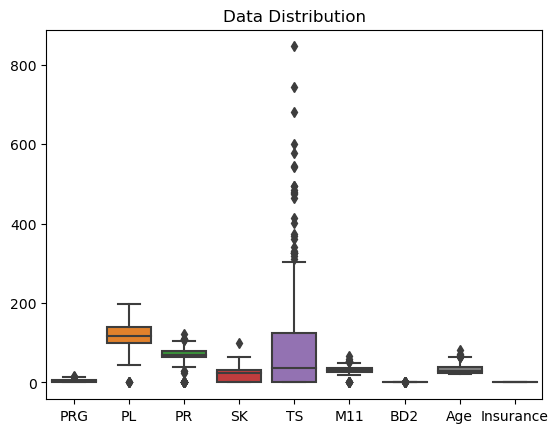

In [9]:
#Test the outliers
sns.boxplot(data=patients_train).set_title('Data Distribution')

#TS has outliers!

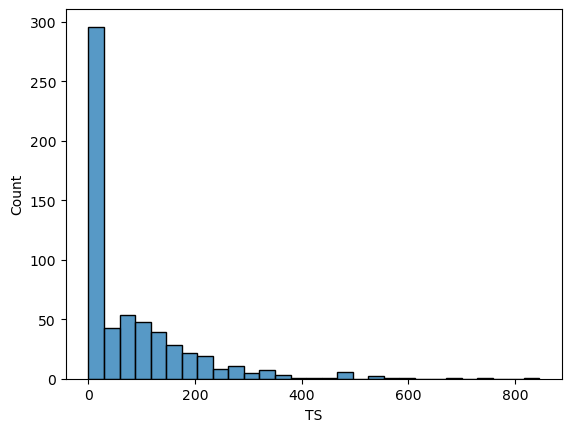

In [15]:
sns.histplot(data=patients_train['TS'] )
plt.show()

In [23]:
#Only 16 rows has the outliers
TS=patients_train.loc[patients_train.TS<400]
TS.shape

(583, 11)

In [24]:
patients_train.corr()


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


In [9]:
patients_train.corr().loc['PRG'].abs().sort_values(ascending=False)

PRG          1.000000
Age          0.532545
PL           0.139541
PR           0.116680
Insurance    0.084631
SK           0.080902
TS           0.054812
BD2          0.052230
M11          0.033482
Name: PRG, dtype: float64

In [9]:
# There is a nice correlation between age and PRG 

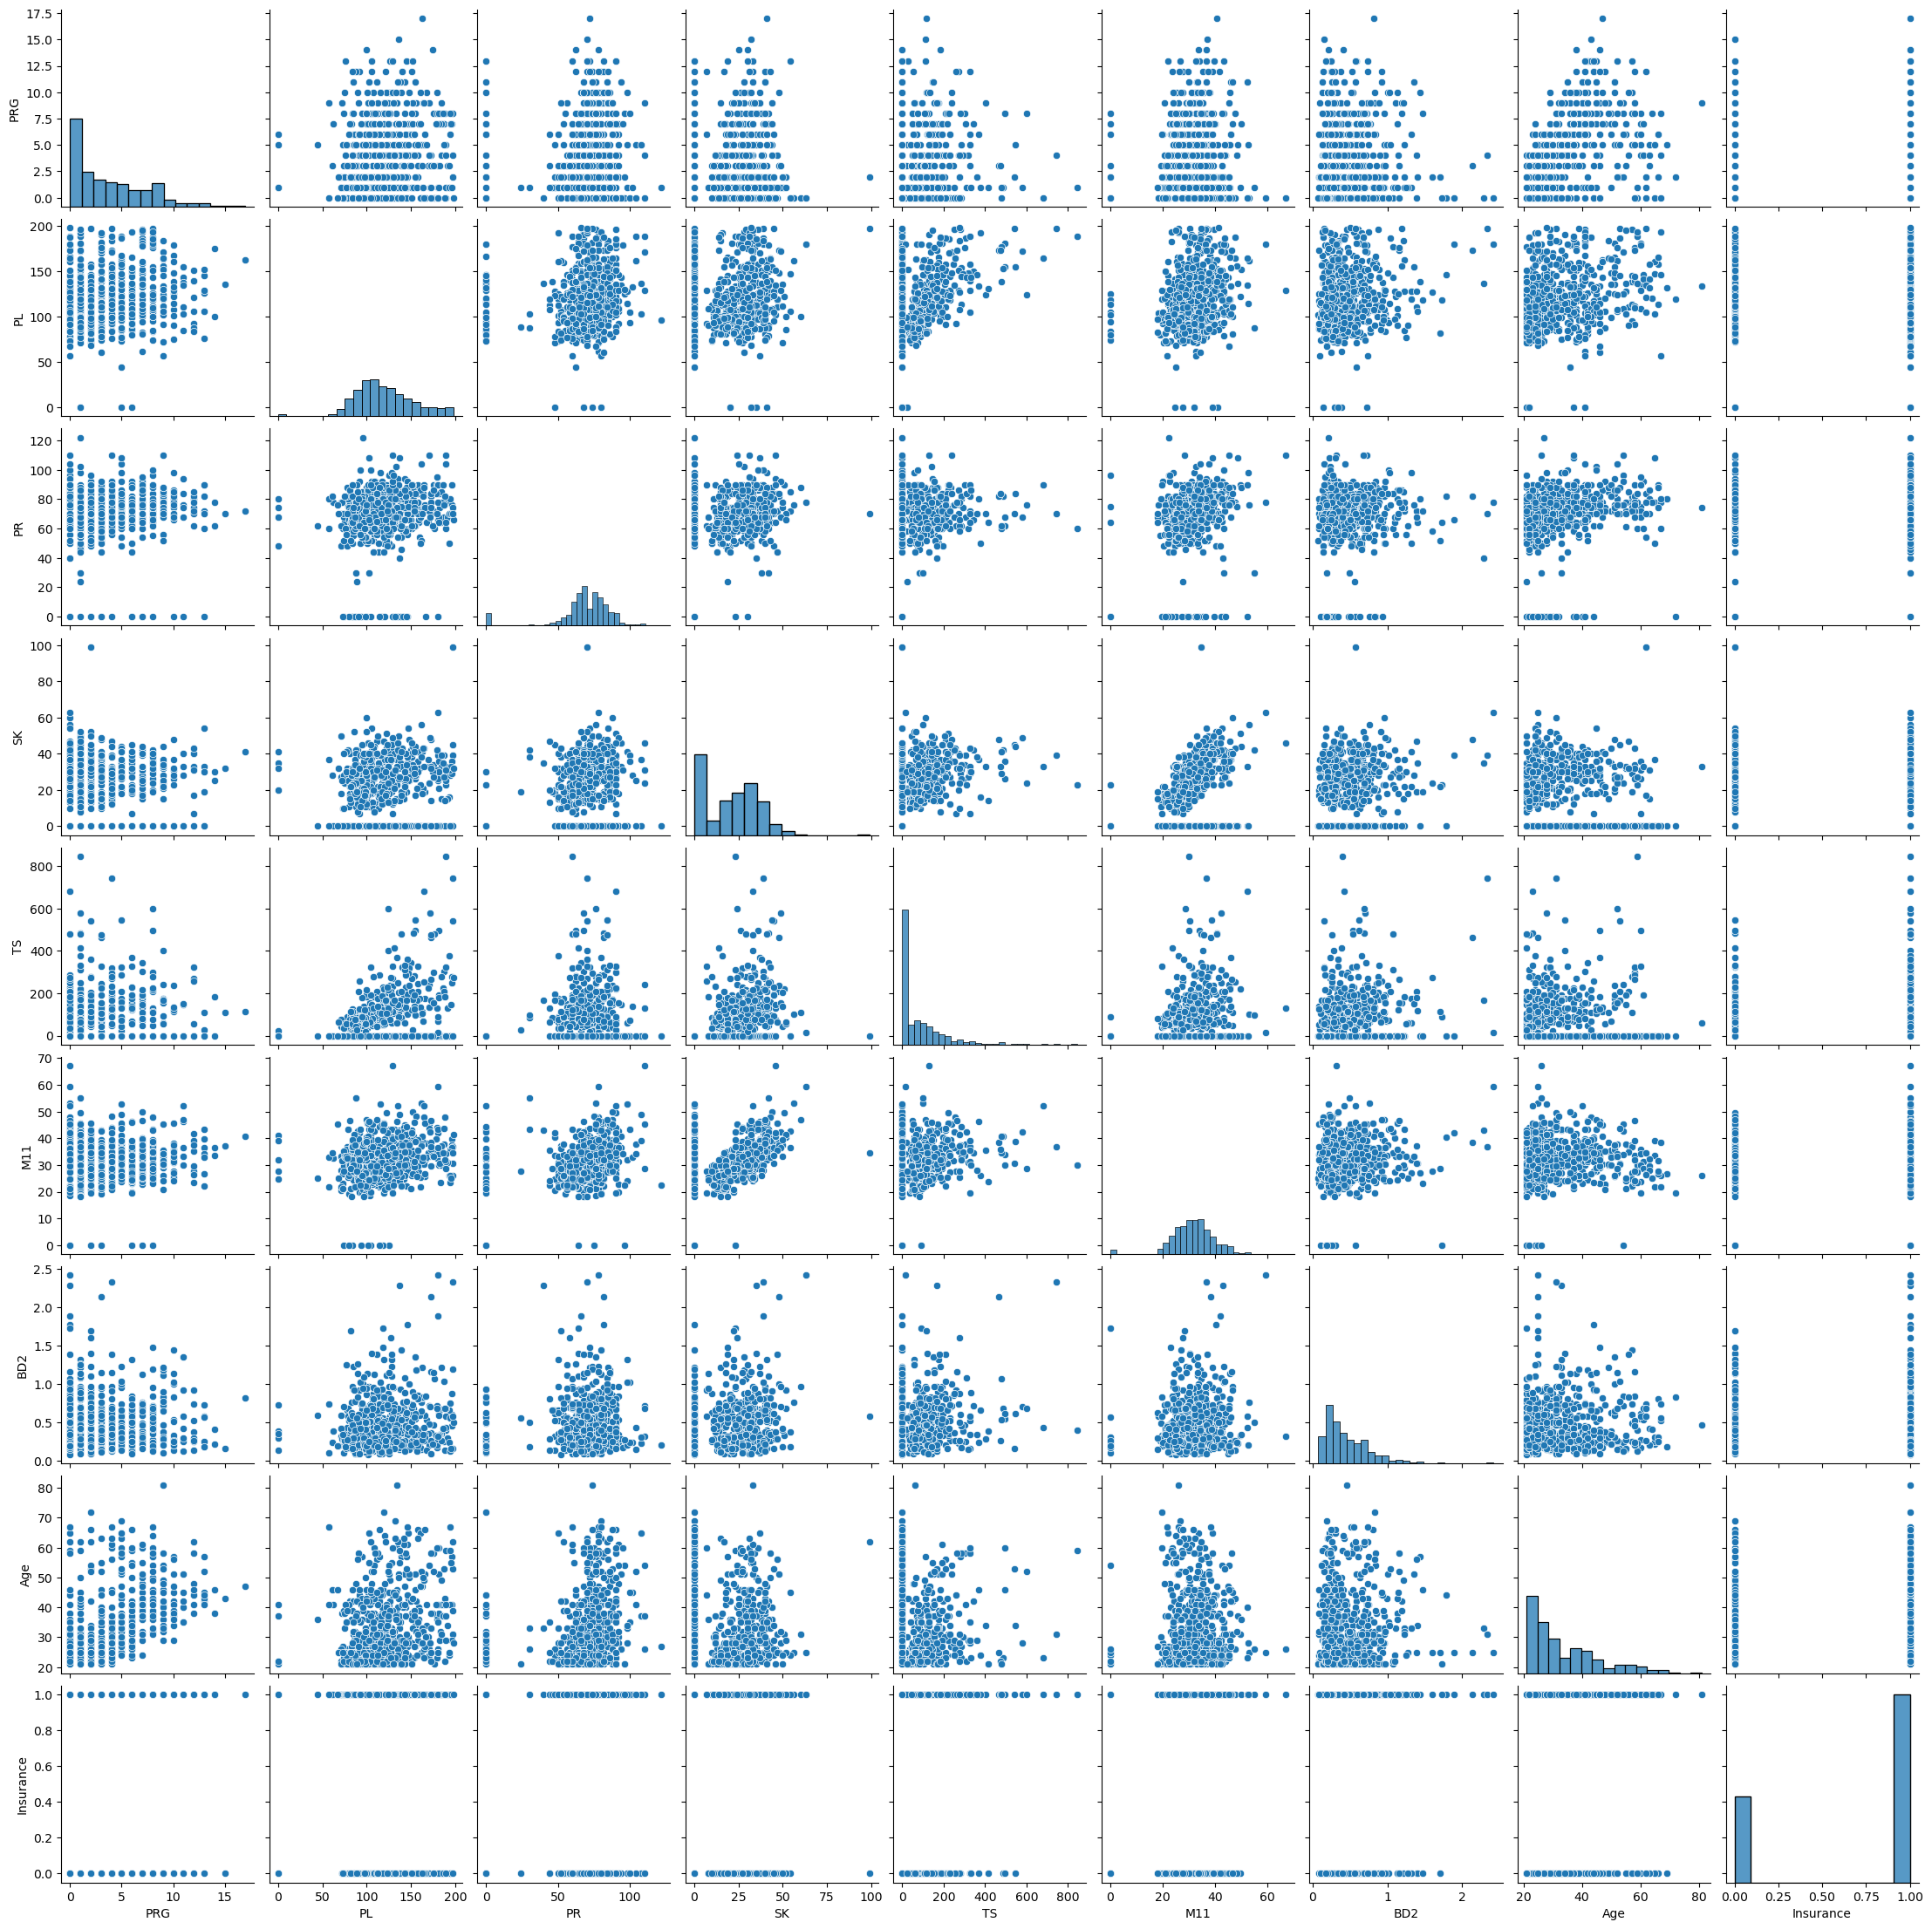

In [20]:
sns.pairplot(patients_train)

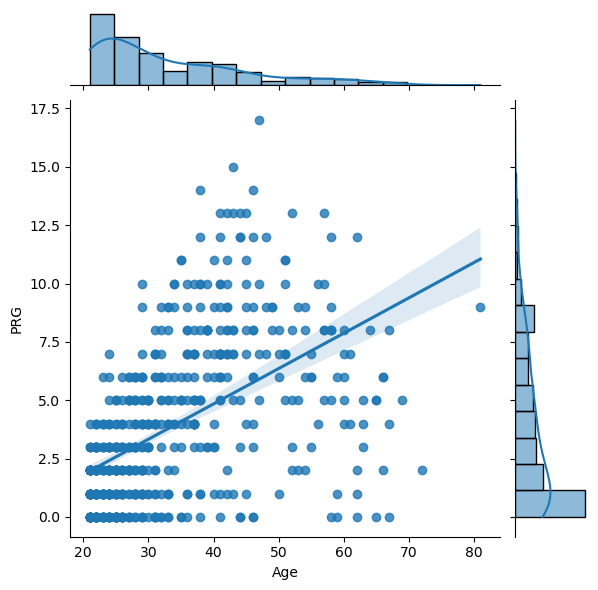

In [21]:
sns.jointplot(x='Age', y='PRG', data=patients_train, kind='reg');

In [10]:
patients_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [11]:
patients_test.nunique()

ID           169
PRG           14
PL            85
PR            33
SK            36
TS            66
M11          122
BD2          156
Age           39
Insurance      2
dtype: int64

In [12]:
#identify missing values
print(patients_test.isnull().sum())

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


Text(0.5, 1.0, 'Data Distribution')

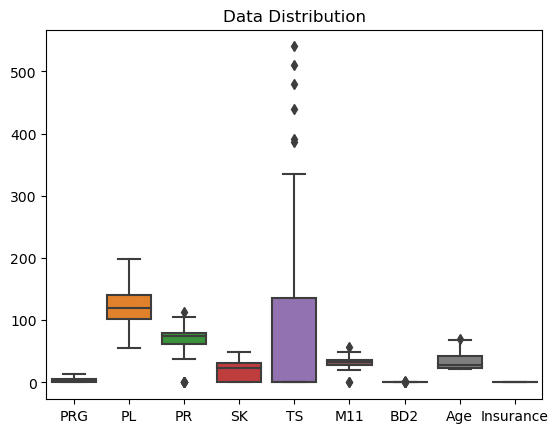

In [13]:
#Test the outliers
sns.boxplot(data=patients_test).set_title('Data Distribution')

#TS has outliers!

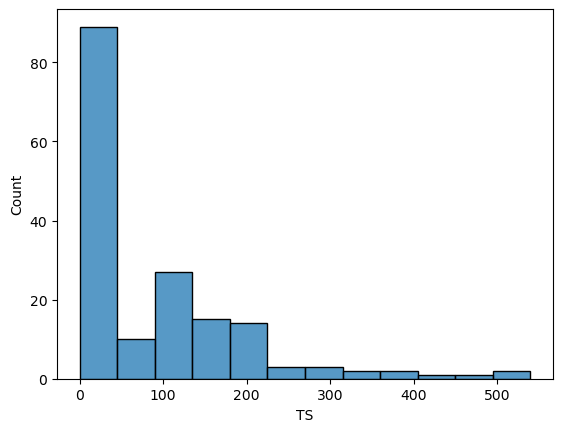

In [14]:
sns.histplot(data=patients_test['TS'] )
plt.show()

In [25]:
TS_test=patients_test.loc[patients_test.TS<400]
TS_test.shape

(165, 10)

In [13]:
patients_test.corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.088808,0.226032,-0.084315,-0.143327,-0.042980,0.041405,0.587779,0.000742
PL,0.088808,1.000000,0.184448,0.070199,0.296815,0.240396,0.119497,0.224456,-0.040125
PR,0.226032,0.184448,1.000000,0.243956,0.064700,0.327511,0.179641,0.292158,-0.134804
SK,-0.084315,0.070199,0.243956,1.000000,0.466503,0.450529,0.214038,-0.086018,-0.023332
TS,-0.143327,0.296815,0.064700,0.466503,1.000000,0.250437,0.051053,-0.159589,-0.114407
M11,-0.042980,0.240396,0.327511,0.450529,0.250437,1.000000,0.201224,-0.001741,-0.001815
BD2,0.041405,0.119497,0.179641,0.214038,0.051053,0.201224,1.000000,0.031738,0.094673
Age,0.587779,0.224456,0.292158,-0.086018,-0.159589,-0.001741,0.031738,1.000000,-0.013863
Insurance,0.000742,-0.040125,-0.134804,-0.023332,-0.114407,-0.001815,0.094673,-0.013863,1.000000


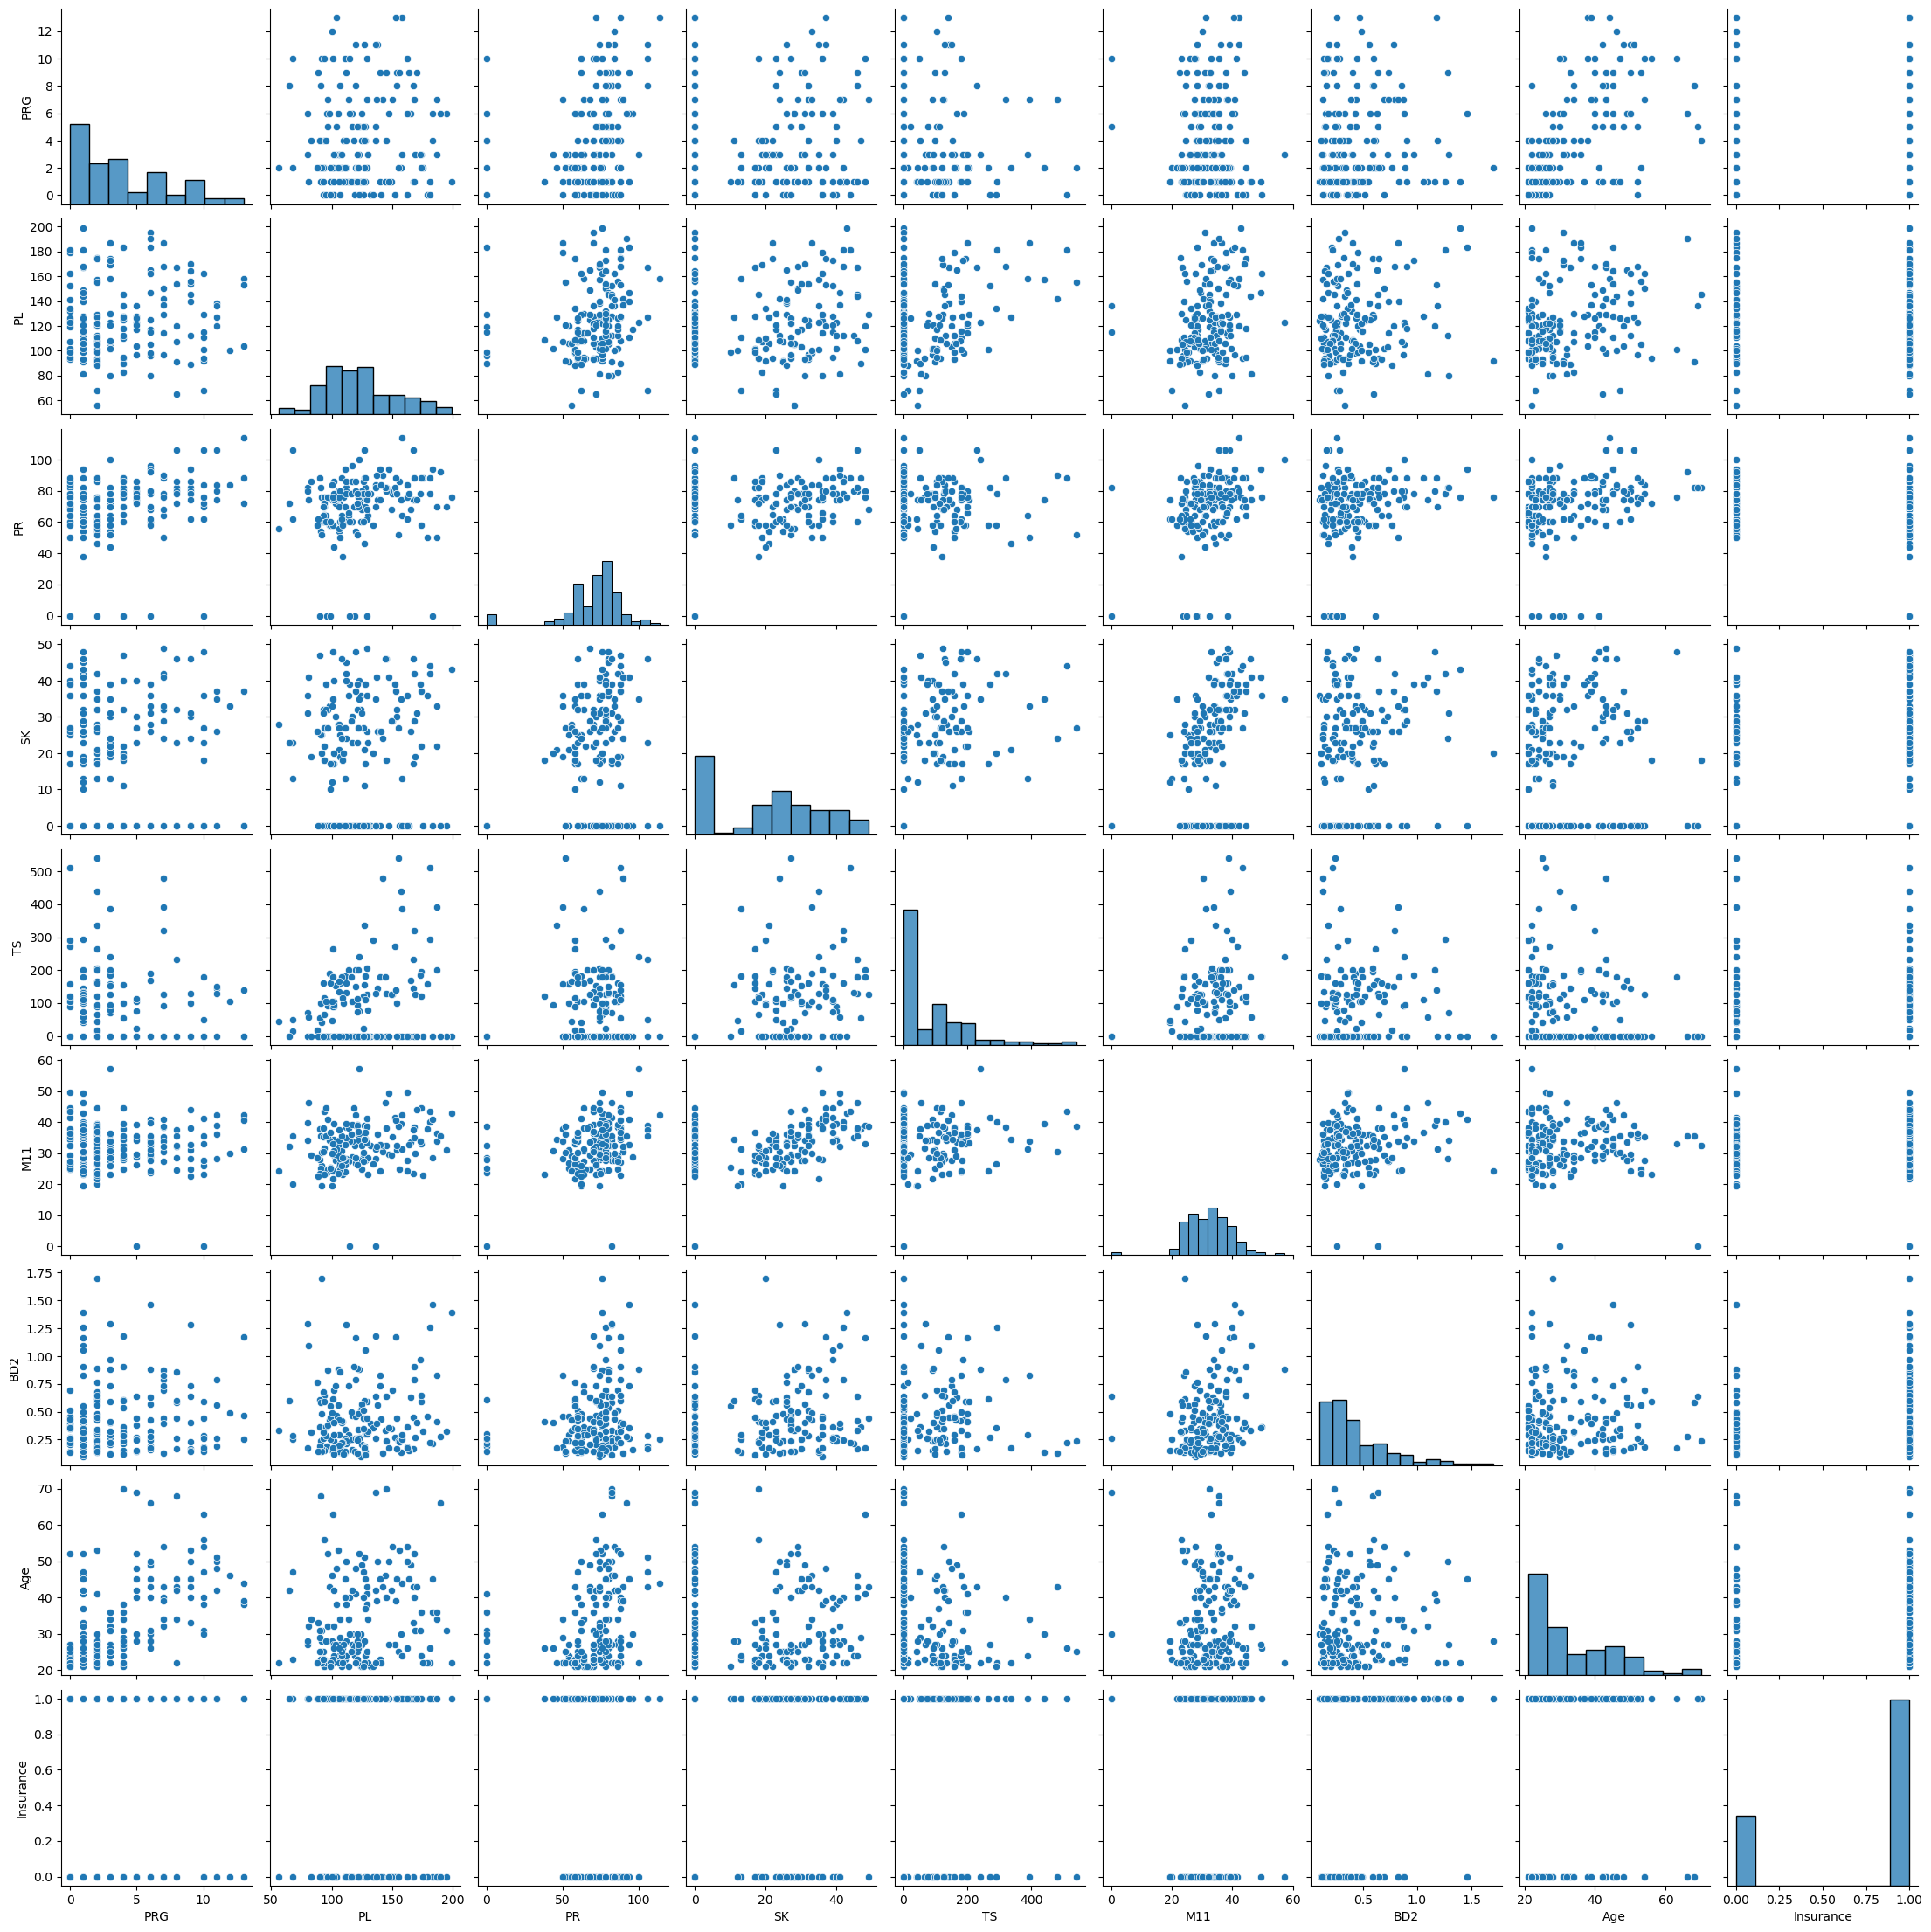

In [14]:
sns.pairplot(patients_test)

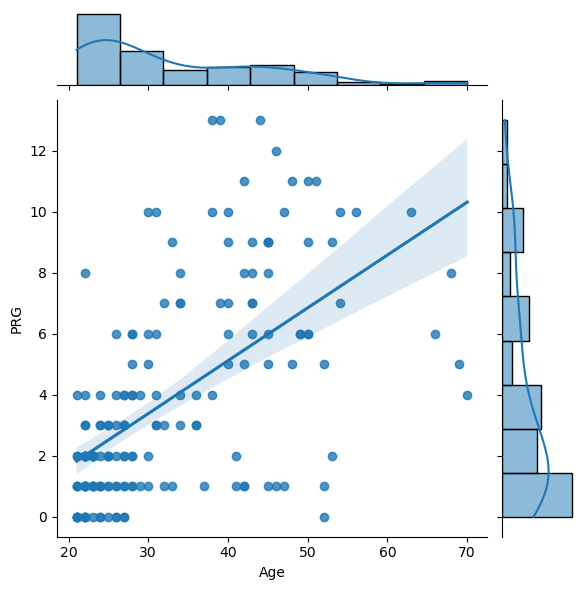

In [15]:
sns.jointplot(x='Age', y='PRG', data=patients_test, kind='reg');

In [17]:
patients_test.corr().loc['PRG'].abs().sort_values(ascending=False)

PRG          1.000000
Age          0.587779
PR           0.226032
TS           0.143327
PL           0.088808
SK           0.084315
M11          0.042980
BD2          0.041405
Insurance    0.000742
Name: PRG, dtype: float64

In [126]:
patients_train= patients_train.drop(columns=['Sepssis', 'ID'])


In [127]:
patients_train.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

# Decision tree

In [128]:


#transform the insurance column
X_insurance = patients_train[['Insurance']]

# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder()

# Fit and transform the 'Insurance' column
X_insurance_encoded = onehot_encoder.fit_transform(X_insurance)

# Convert the encoded data to a DataFrame
X_insurance_encoded_df = pd.DataFrame(X_insurance_encoded.toarray(), columns=onehot_encoder.get_feature_names(['Insurance']))

# Replace the original 'Insurance' column with the encoded one
patients_train= patients_train.drop('Insurance', axis=1)
patients_train['no Insurance']=X_insurance_encoded_df['Insurance_0']
patients_train['have Insurance']=X_insurance_encoded_df['Insurance_1']
patients_train.columns




Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'no Insurance',
       'have Insurance'],
      dtype='object')

In [129]:
#define X and y
X=patients_train.drop('PRG', axis=1)
y=patients_train['PRG']

In [130]:
X.columns

Index(['PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'no Insurance',
       'have Insurance'],
      dtype='object')

In [131]:
model = DecisionTreeRegressor(min_samples_leaf=10, 
                              ccp_alpha=0.01, 
                              max_leaf_nodes=40,
                              max_depth=6)
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=6, max_leaf_nodes=40,
                      min_samples_leaf=10)

In [132]:
export_graphviz(model)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[6] <= 31.5\\nsquared_error = 11.29\\nsamples = 599\\nvalue = 3.825"] ;\n1 [label="X[6] <= 26.5\\nsquared_error = 3.505\\nsamples = 342\\nvalue = 2.079"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[4] <= 36.05\\nsquared_error = 2.064\\nsamples = 233\\nvalue = 1.575"] ;\n1 -> 2 ;\n3 [label="X[6] <= 22.5\\nsquared_error = 2.098\\nsamples = 179\\nvalue = 1.771"] ;\n2 -> 3 ;\n4 [label="X[5] <= 0.449\\nsquared_error = 1.136\\nsamples = 91\\nvalue = 1.308"] ;\n3 -> 4 ;\n5 [label="X[5] <= 0.301\\nsquared_error = 1.302\\nsamples = 57\\nvalue = 1.526"] ;\n4 -> 5 ;\n6 [label="squared_error = 1.199\\nsamples = 40\\nvalue = 1.275"] ;\n5 -> 6 ;\n7 [label="squared_error = 1.045\\nsamples = 17\\nvalue = 2.118"] ;\n5 -> 7 ;\n8 [label="squared_error = 0.644\\nsamples = 34\\nvalue = 0.941"] ;\n4 -> 8 ;\n9 [label="X[2] <= 24.5\\nsquared_error = 2.642\\nsamples = 88\\nvalu

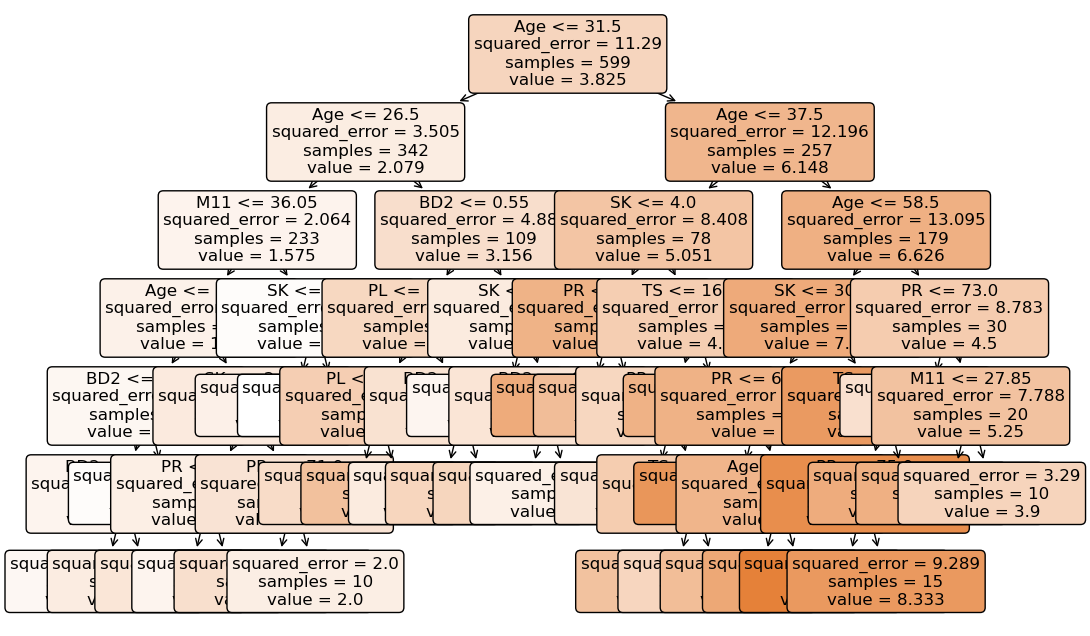

In [136]:
def visualize_tree(model, md=4, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=12);
visualize_tree(model, md=7)

In [137]:
#prediction
y_pred = model.predict(X)

In [138]:
PRG_rmse = mse(y, y_pred, squared=False)
print(f"RMSE = {PRG_rmse:.2f}")

RMSE = 2.22


In [139]:
y.mean()
# The error is very big relative to y.mean

3.8247078464106843

In [140]:
#Features importances
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature:12}: {importance}')
    


PL          : 0.02049457117543289
PR          : 0.04767416454428264
SK          : 0.05574910414264921
TS          : 0.0377608702217554
M11         : 0.017395111971378566
BD2         : 0.02894067207480957
Age         : 0.7919855058696916
no Insurance: 0.0
have Insurance: 0.0


In [141]:
# We can drop the insurance
X= X.drop(columns=[ 'no Insurance','have Insurance'])

In [142]:
X.columns

Index(['PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

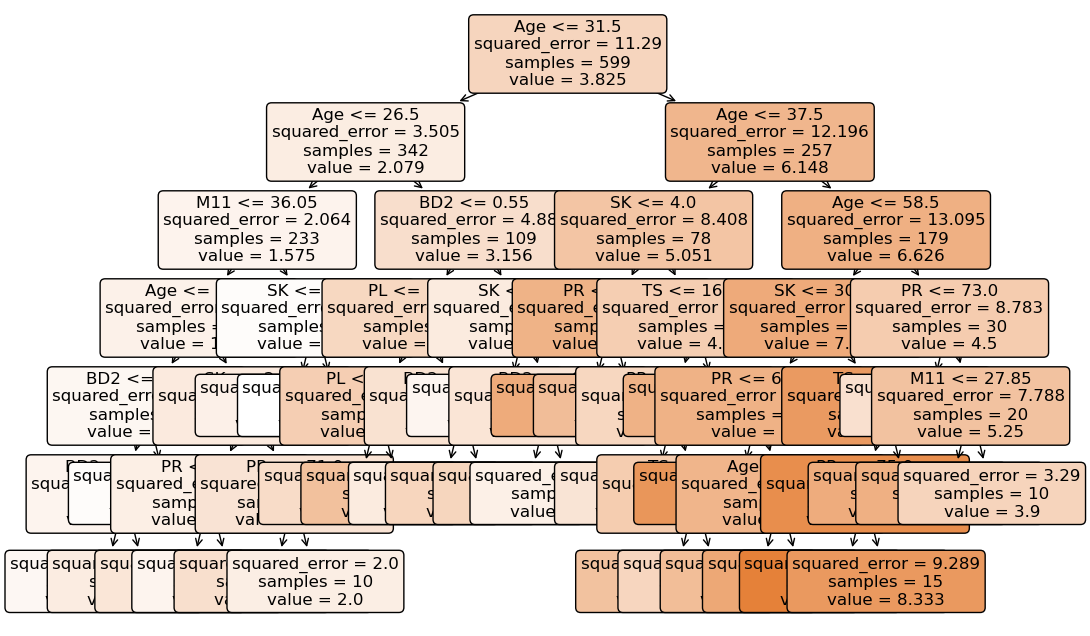

In [144]:
#fit the model on new X
model.fit(X, y)

export_graphviz(model)

def visualize_tree(model, md=4, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=12);
visualize_tree(model, md=7)


In [145]:
#prediction
y_pred = model.predict(X)

#
PRG_rmse = mse(y, y_pred, squared=False)
print(f"RMSE = {PRG_rmse:.2f}")

print ( y.mean())




RMSE = 2.22
3.8247078464106843


In [146]:
#Validating the model
patients_test=patients_test.drop(columns=['Insurance', 'ID'])
patients_test

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63
165,2,122,70,27,0,36.8,0.340,27
166,5,121,72,23,112,26.2,0.245,30
167,1,126,60,0,0,30.1,0.349,47


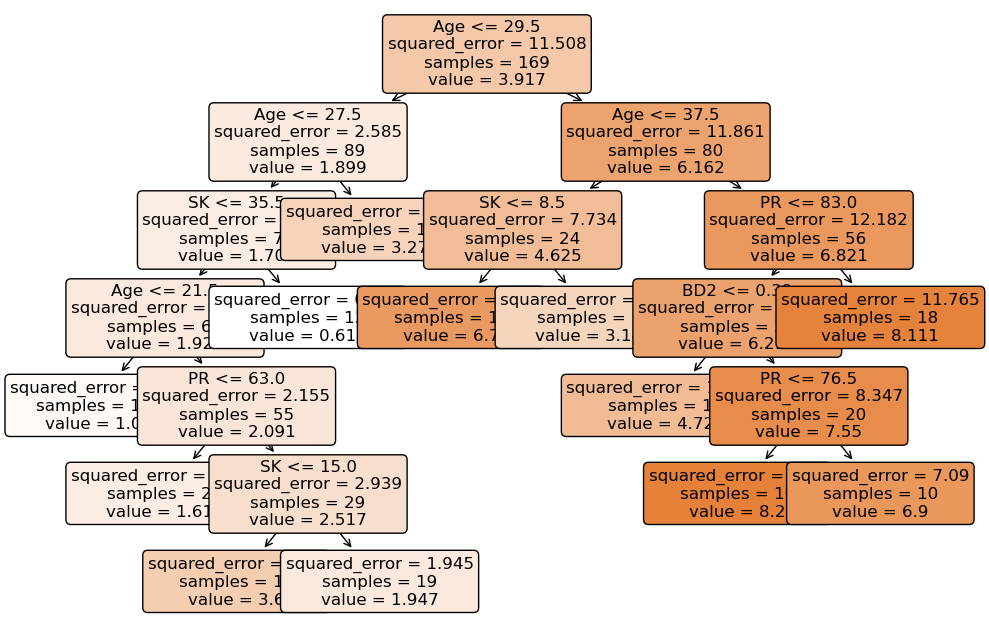

In [148]:
#define X and y
X_test=patients_test.drop('PRG', axis=1)
y_test=patients_test['PRG']

model.fit(X_test, y_test)

export_graphviz(model)

def visualize_tree(model, md=4, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=12);
visualize_tree(model, md=7)



In [149]:
#prediction
y_test_pred = model.predict(X_test)

#
PRG_rmse_test = mse(y_test, y_test_pred, squared=False)
print(f"RMSE = {PRG_rmse_test:.2f}")


RMSE = 2.20


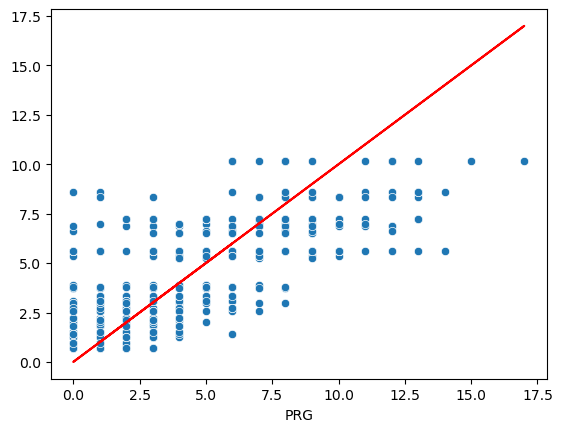

In [150]:



ax = sns.scatterplot(x=y, y=y_pred)
ax.plot(y, y, 'r')

# Decision tree gives a better result then linear regression